In [8]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Warnings
import warnings
warnings.filterwarnings('ignore')

# Set plot style
sns.set(style="whitegrid")


In [9]:
# Load the pipe-delimited dataset
data_path = "../data/raw/MachineLearningRating_v3.txt"
df = pd.read_csv(data_path, sep="|")

# Quick check
df.head()


,UnderwrittenCoverID,PolicyID,TransactionMonth,IsVATRegistered,Citizenship,LegalType,Title,Language,Bank,AccountType,...,ExcessSelected,CoverCategory,CoverType,CoverGroup,Section,Product,StatutoryClass,StatutoryRiskType,TotalPremium,TotalClaims
0,145249,12827,2015-03-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
1,145249,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,21.929825,0.0
2,145249,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Windscreen,Windscreen,Windscreen,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0
3,145255,12827,2015-05-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,512.848070,0.0
4,145255,12827,2015-07-01 00:00:00,True,,Close Corporation,Mr,English,First National Bank,Current account,...,Mobility - Metered Taxis - R2000,Own damage,Own Damage,Comprehensive - Taxi,Motor Comprehensive,Mobility Metered Taxis: Monthly,Commercial,IFRS Constant,0.000000,0.0


UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

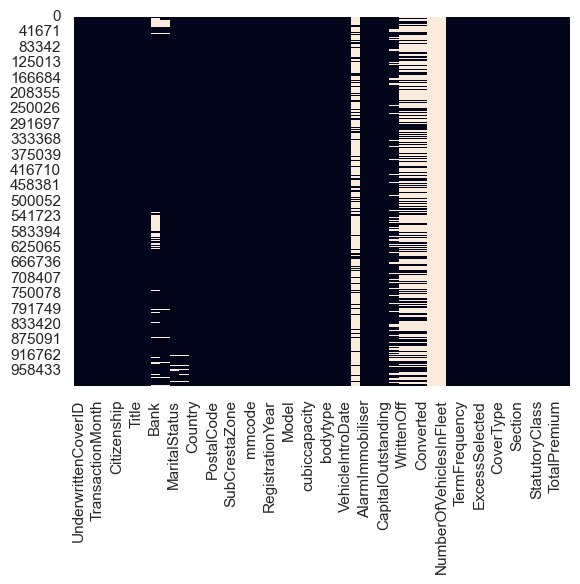

In [11]:
# Missing values
print(df.isnull().sum())

# Visualize missing values
sns.heatmap(df.isnull(), cbar=False)
plt.show()


In [3]:
# Data info
df.info()

# Basic stats
df.describe(include='all')

# Check missing values
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000098 entries, 0 to 1000097
Data columns (total 52 columns):
 #   Column                    Non-Null Count    Dtype  
---  ------                    --------------    -----  
 0   UnderwrittenCoverID       1000098 non-null  int64  
 1   PolicyID                  1000098 non-null  int64  
 2   TransactionMonth          1000098 non-null  object 
 3   IsVATRegistered           1000098 non-null  bool   
 4   Citizenship               1000098 non-null  object 
 5   LegalType                 1000098 non-null  object 
 6   Title                     1000098 non-null  object 
 7   Language                  1000098 non-null  object 
 8   Bank                      854137 non-null   object 
 9   AccountType               959866 non-null   object 
 10  MaritalStatus             991839 non-null   object 
 11  Gender                    990562 non-null   object 
 12  Country                   1000098 non-null  object 
 13  Province                  1

UnderwrittenCoverID               0
PolicyID                          0
TransactionMonth                  0
IsVATRegistered                   0
Citizenship                       0
LegalType                         0
Title                             0
Language                          0
Bank                         145961
AccountType                   40232
MaritalStatus                  8259
Gender                         9536
Country                           0
Province                          0
PostalCode                        0
MainCrestaZone                    0
SubCrestaZone                     0
ItemType                          0
mmcode                          552
VehicleType                     552
RegistrationYear                  0
make                            552
Model                           552
Cylinders                       552
cubiccapacity                   552
kilowatts                       552
bodytype                        552
NumberOfDoors               

In [16]:
# Strip extra spaces from string columns
for col in df.select_dtypes(include='object').columns:
    df[col] = df[col].str.strip()

# Convert date columns to datetime
df['TransactionMonth'] = pd.to_datetime(df['TransactionMonth'])
df['VehicleIntroDate'] = pd.to_datetime(df['VehicleIntroDate'], errors='coerce')

# Example: Fill missing numeric values with 0
df['CustomValueEstimate'].fillna(0, inplace=True)


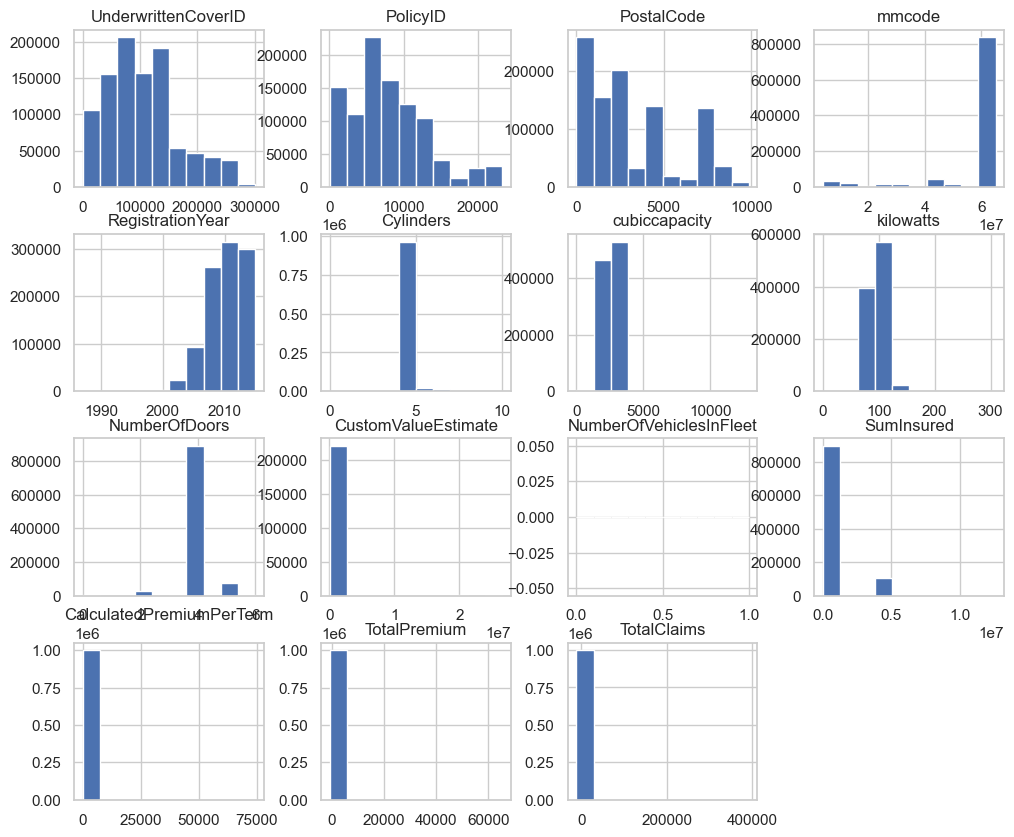

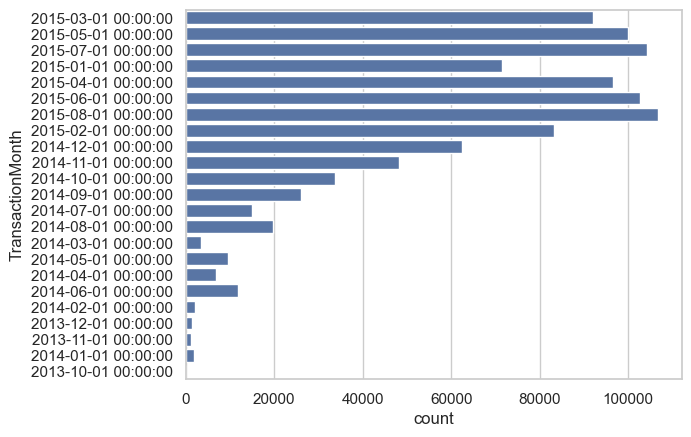

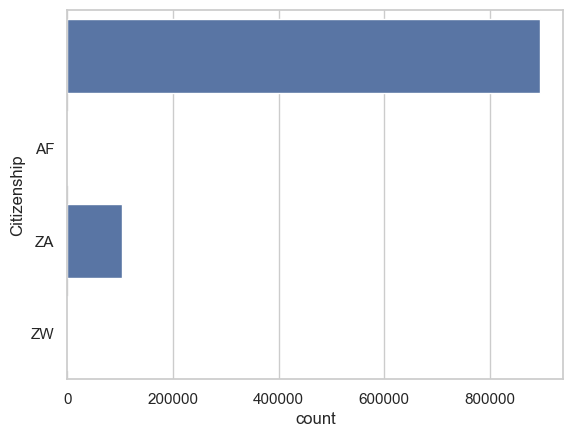

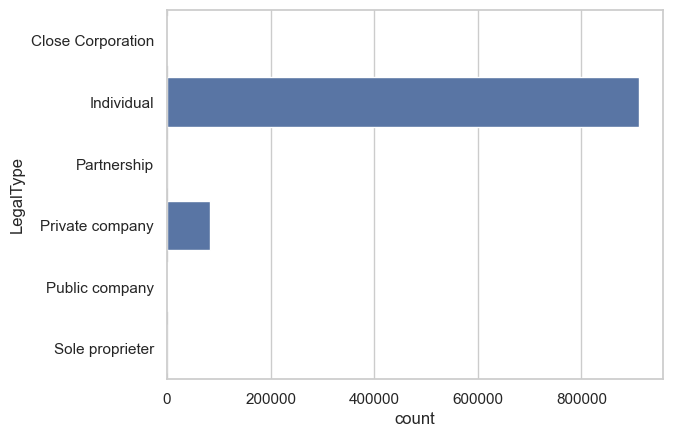

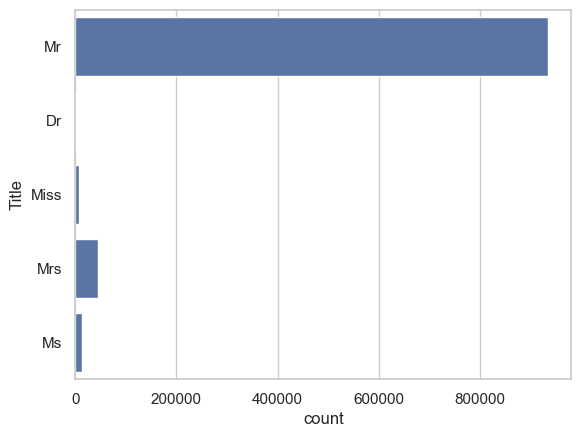

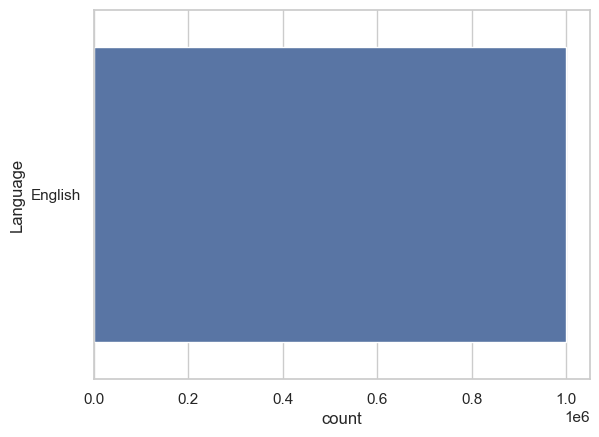

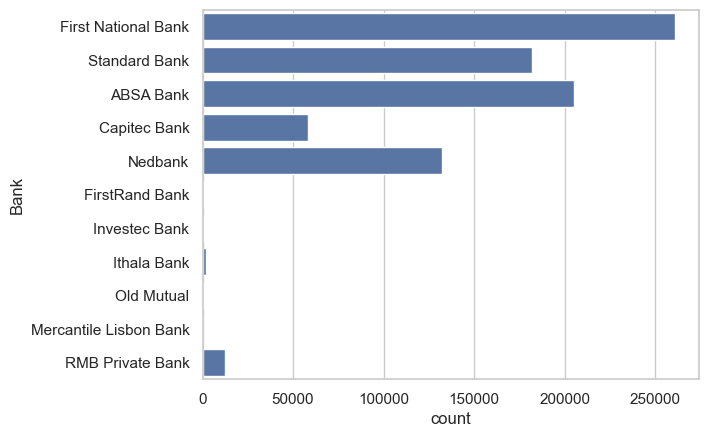

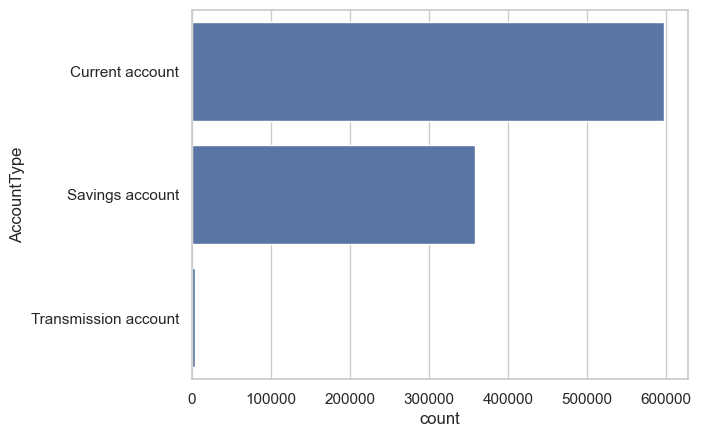

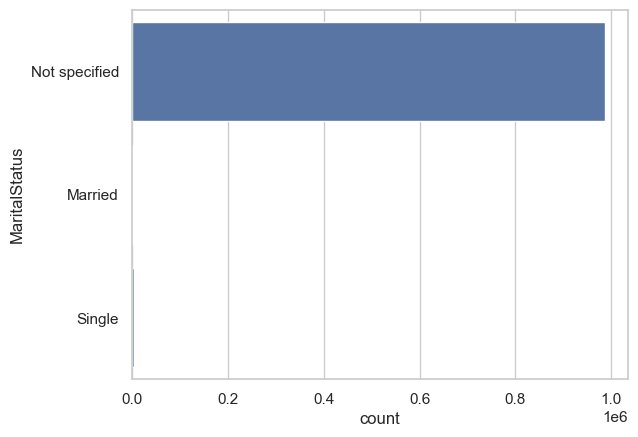

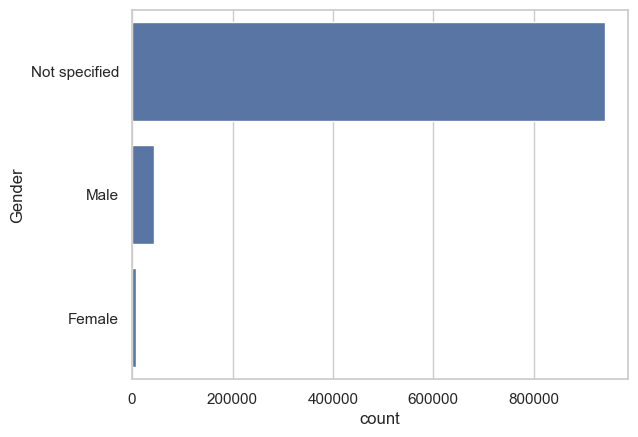

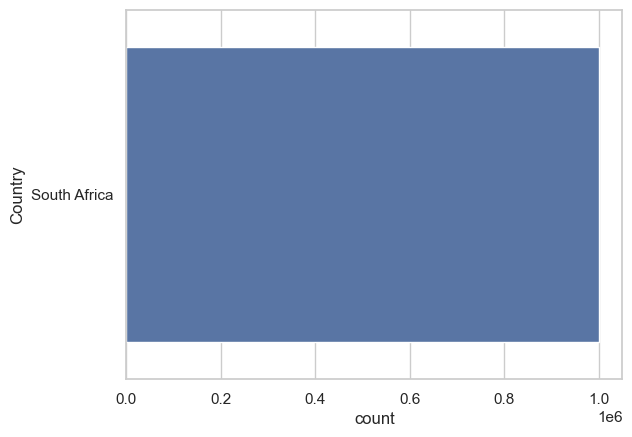

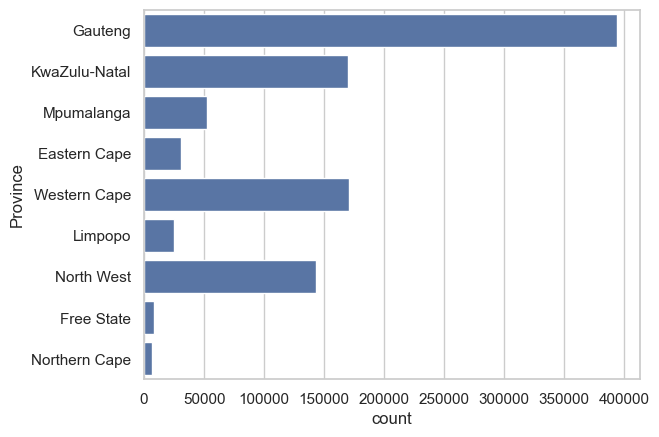

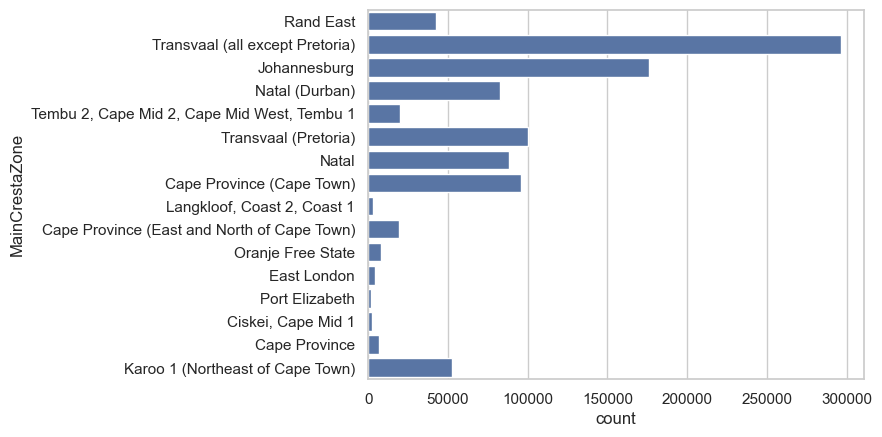

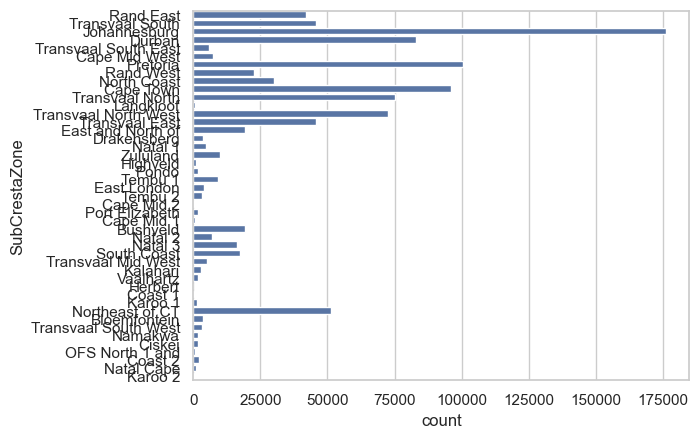

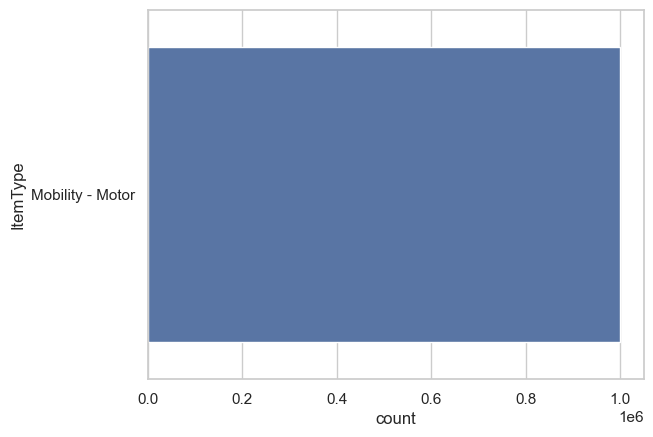

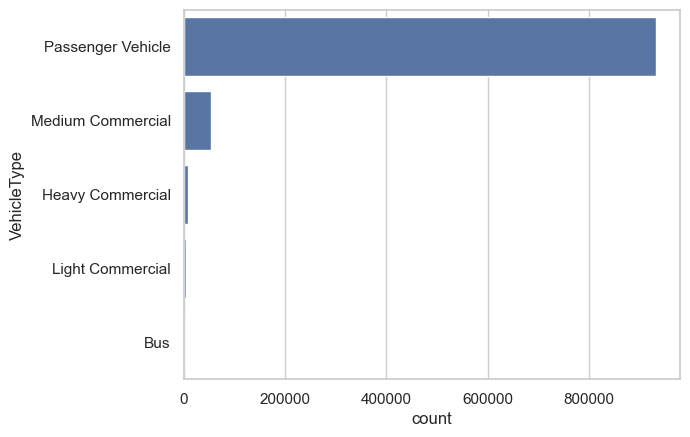

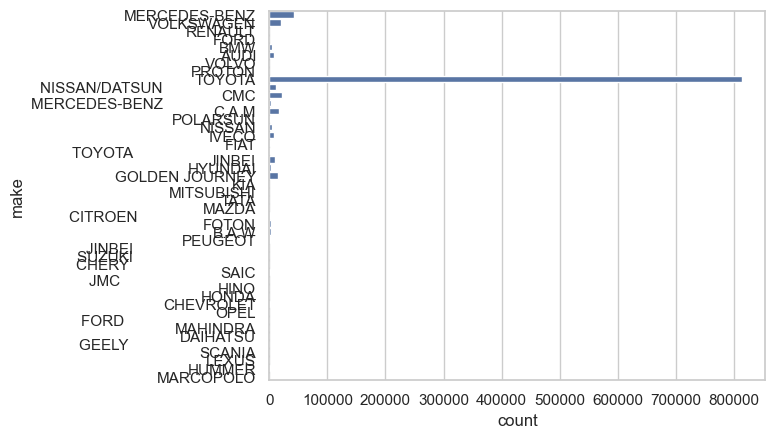

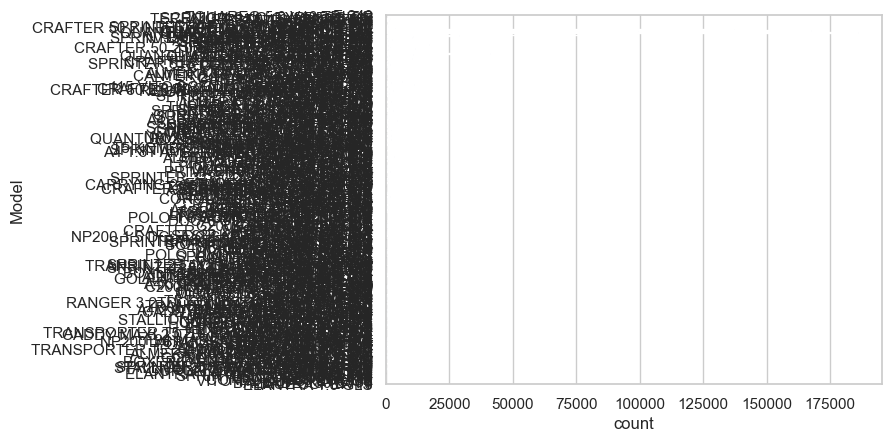

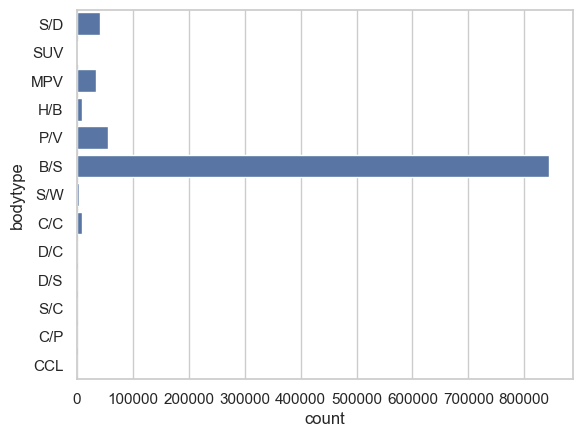

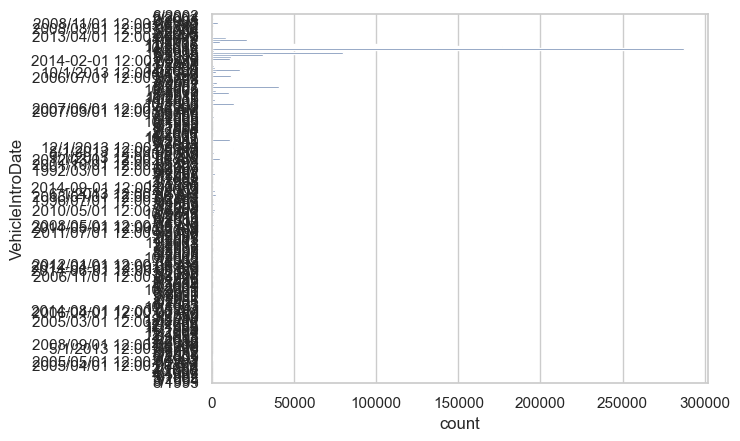

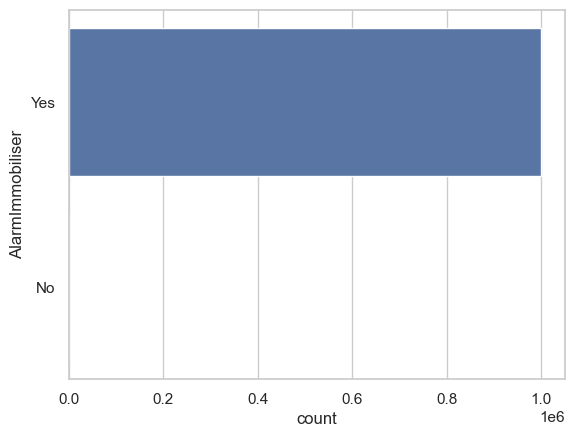

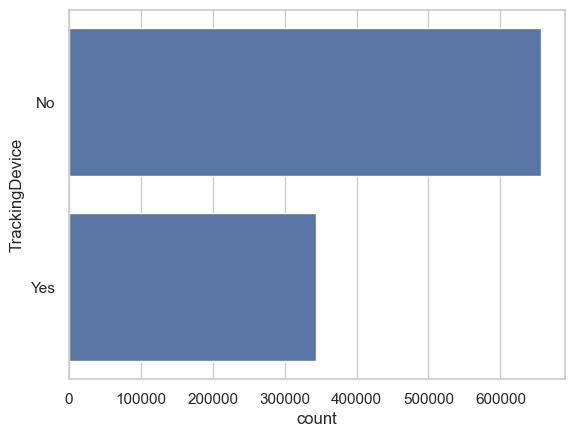

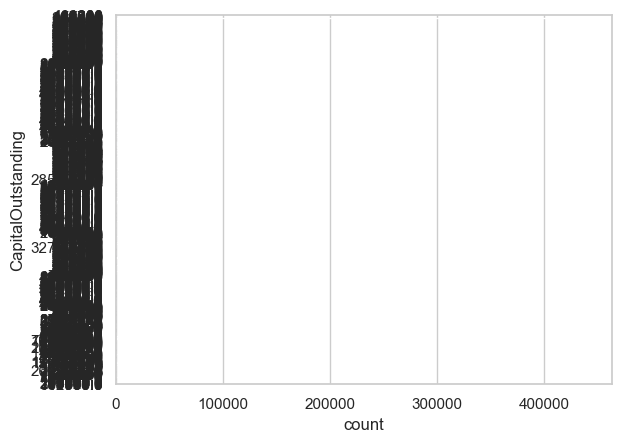

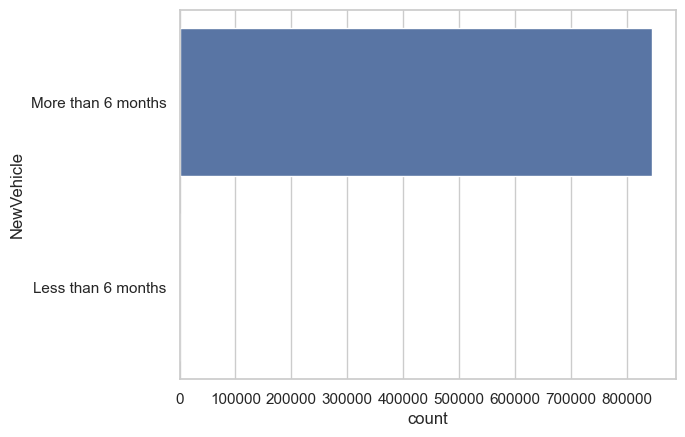

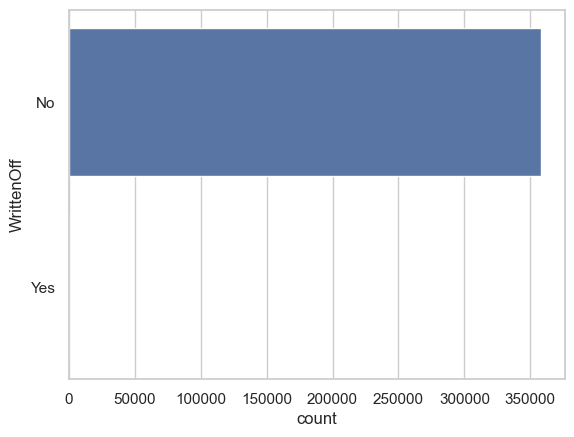

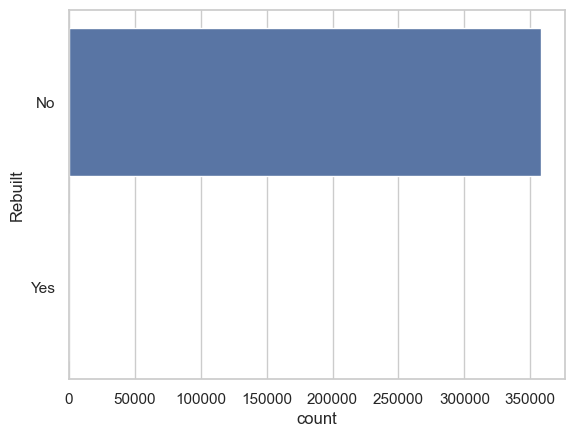

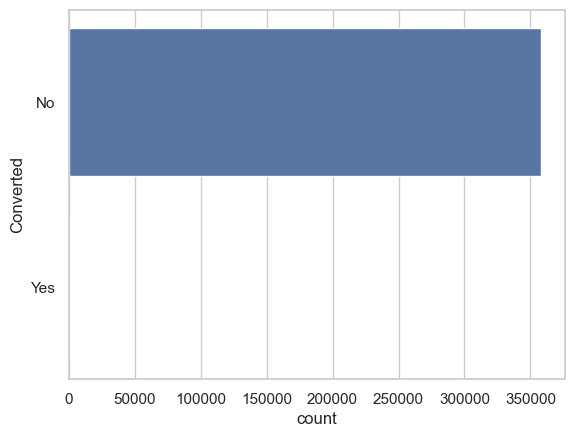

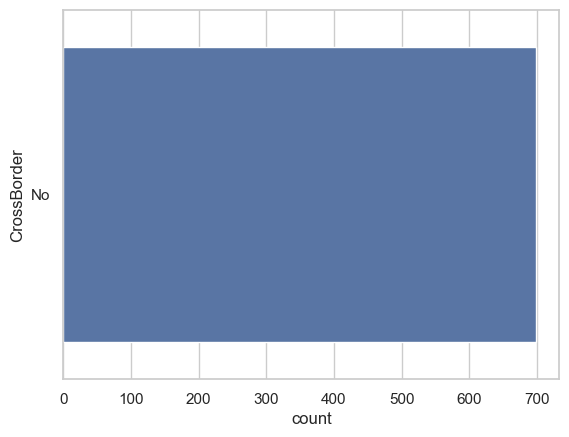

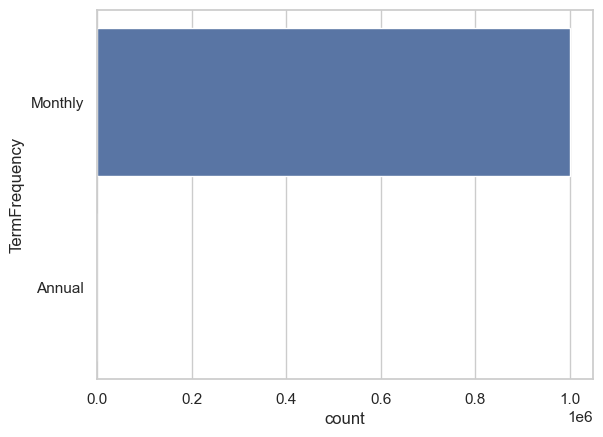

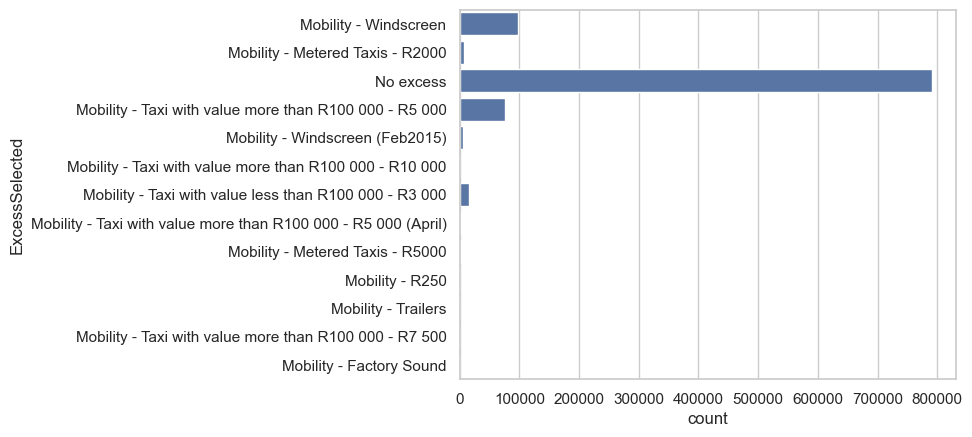

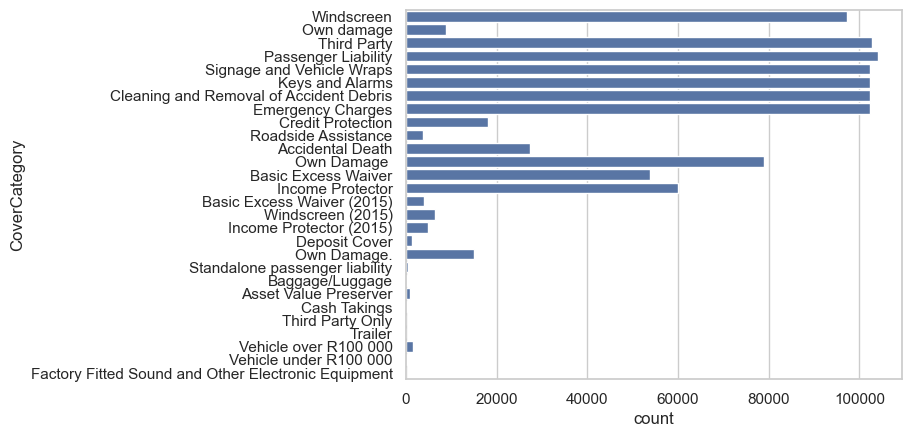

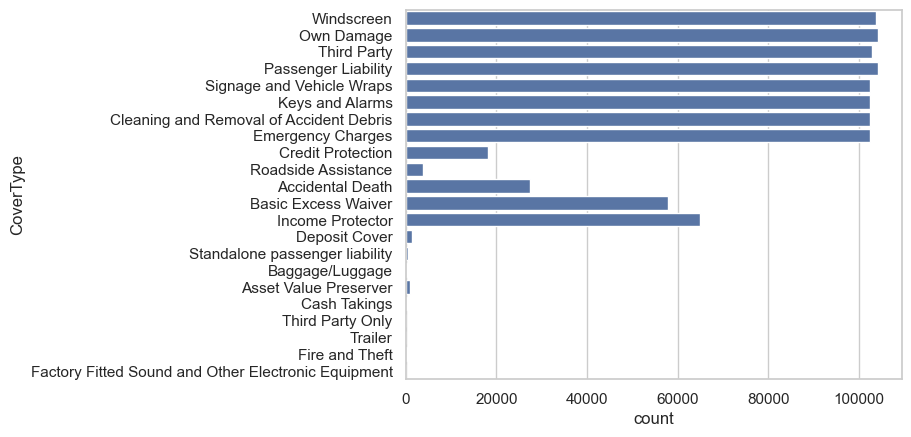

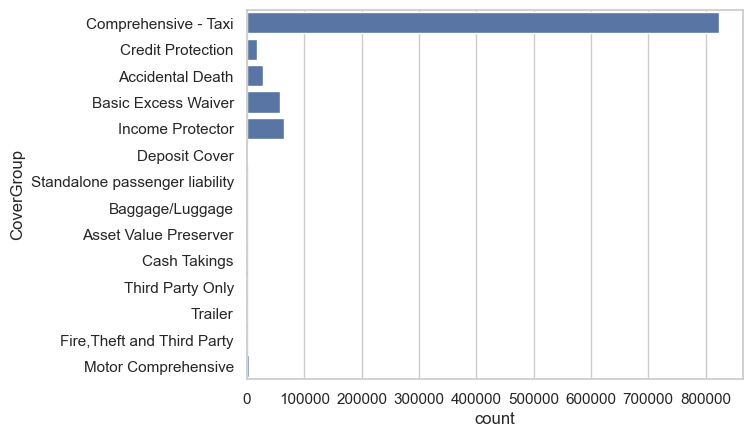

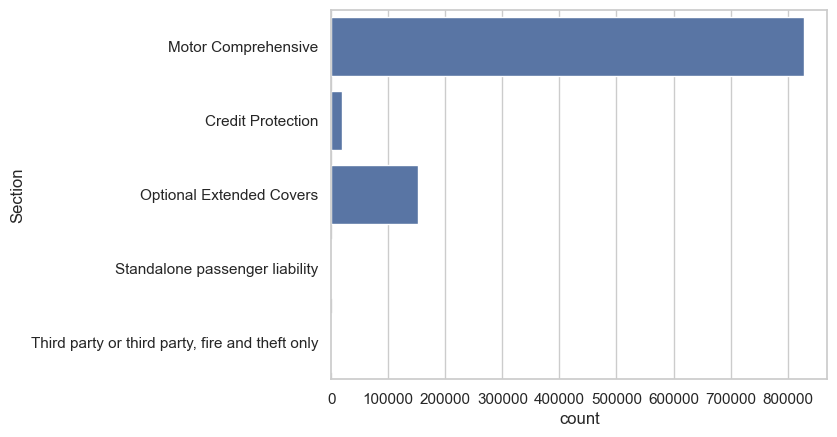

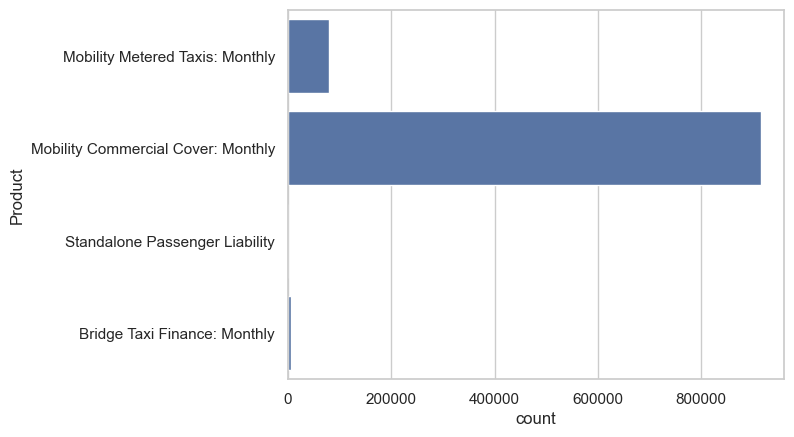

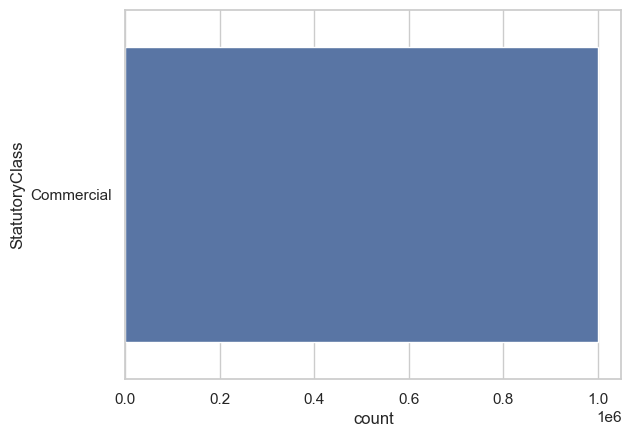

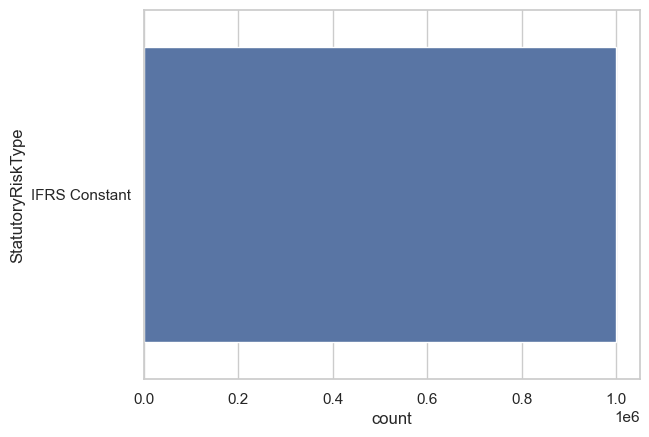

In [12]:
# Numeric distributions
numeric_cols = df.select_dtypes(include=np.number).columns
df[numeric_cols].hist(figsize=(12,10))
plt.show()

# Categorical distributions
categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    sns.countplot(y=col, data=df)
    plt.show()


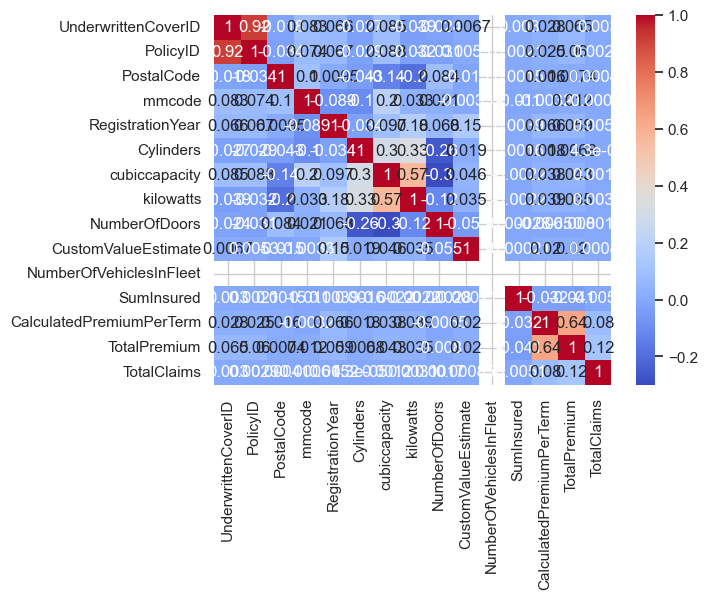

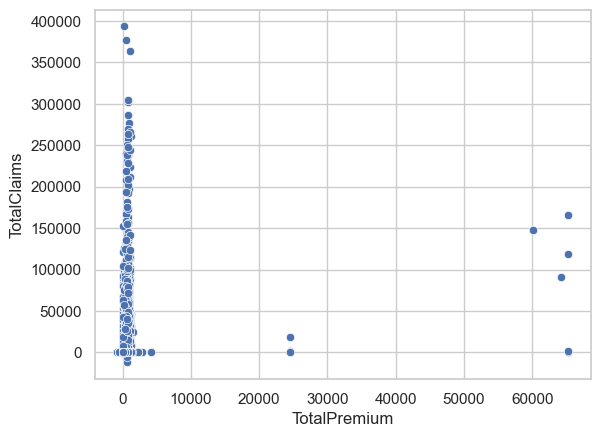

In [13]:
# Correlation heatmap
corr = df[numeric_cols].corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.show()

# Example scatter plot
sns.scatterplot(x='TotalPremium', y='TotalClaims', data=df)
plt.show()


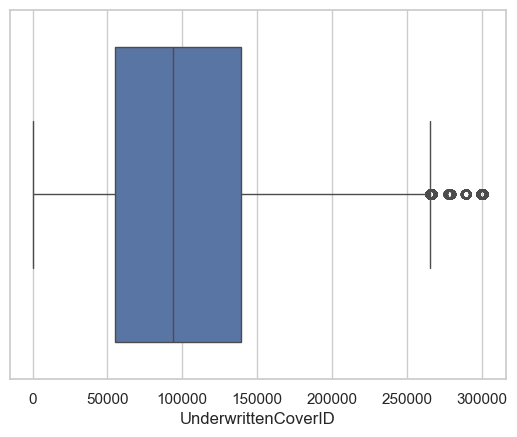

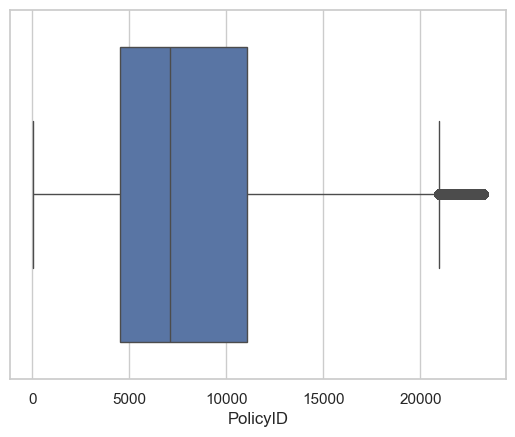

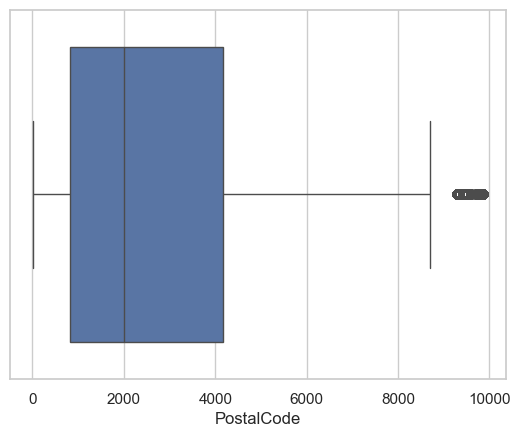

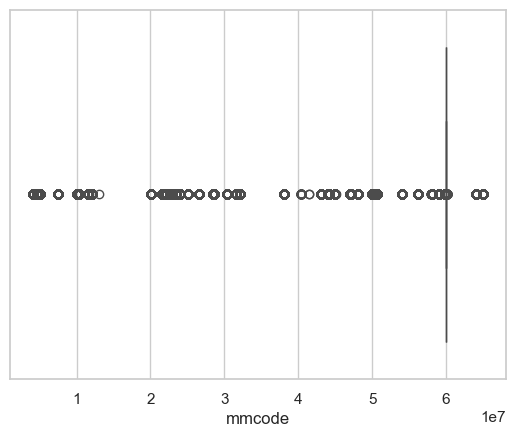

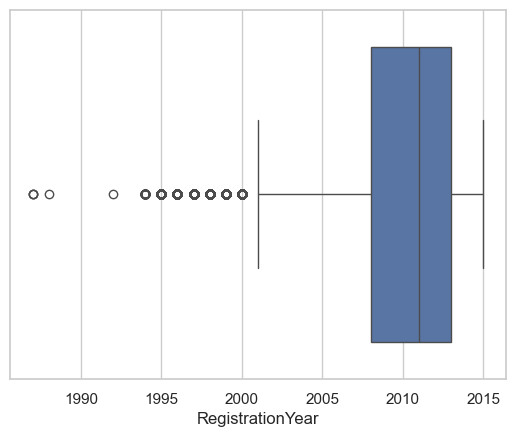

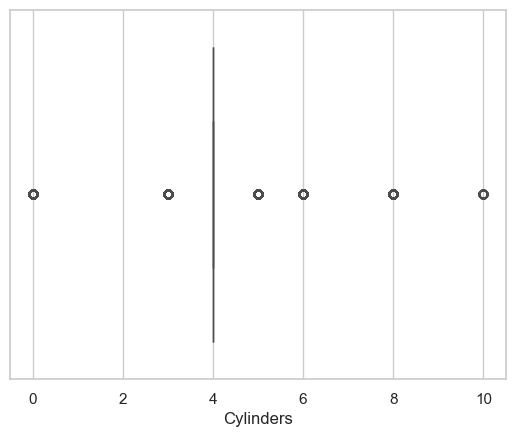

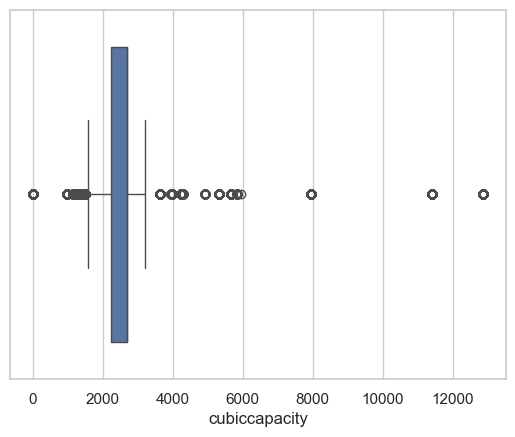

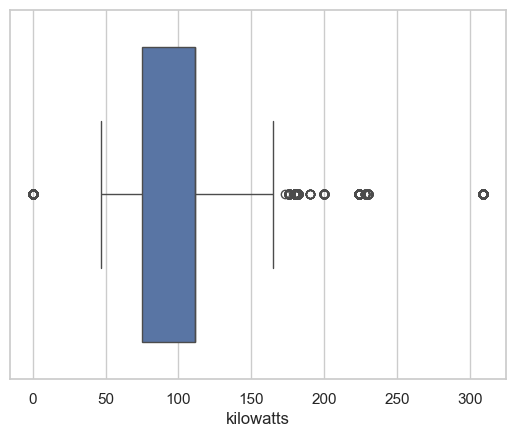

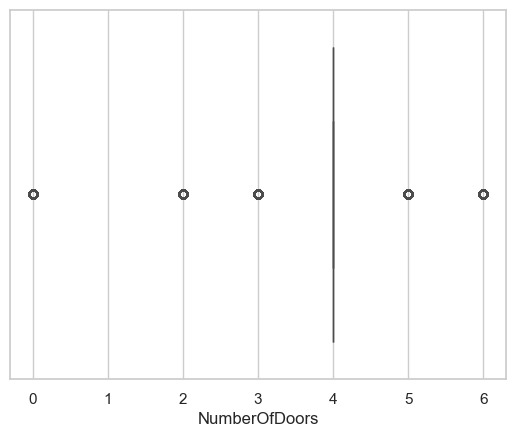

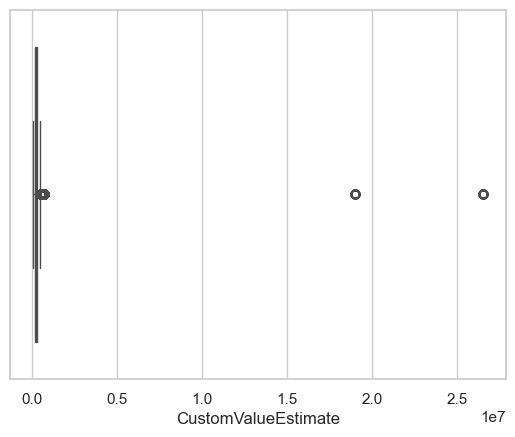

ValueError: List of boxplot statistics and `positions` values must have same the length

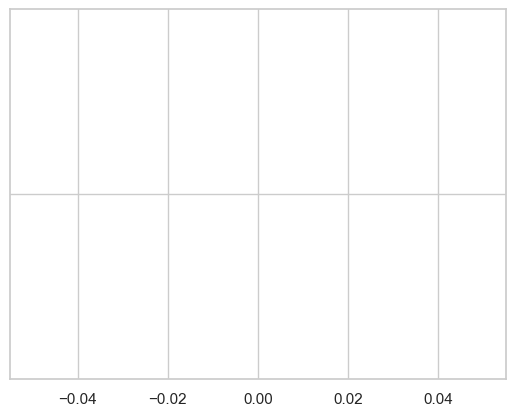

In [15]:
# Boxplots for numeric columns
for col in numeric_cols:
    sns.boxplot(x=df[col])
    plt.show()


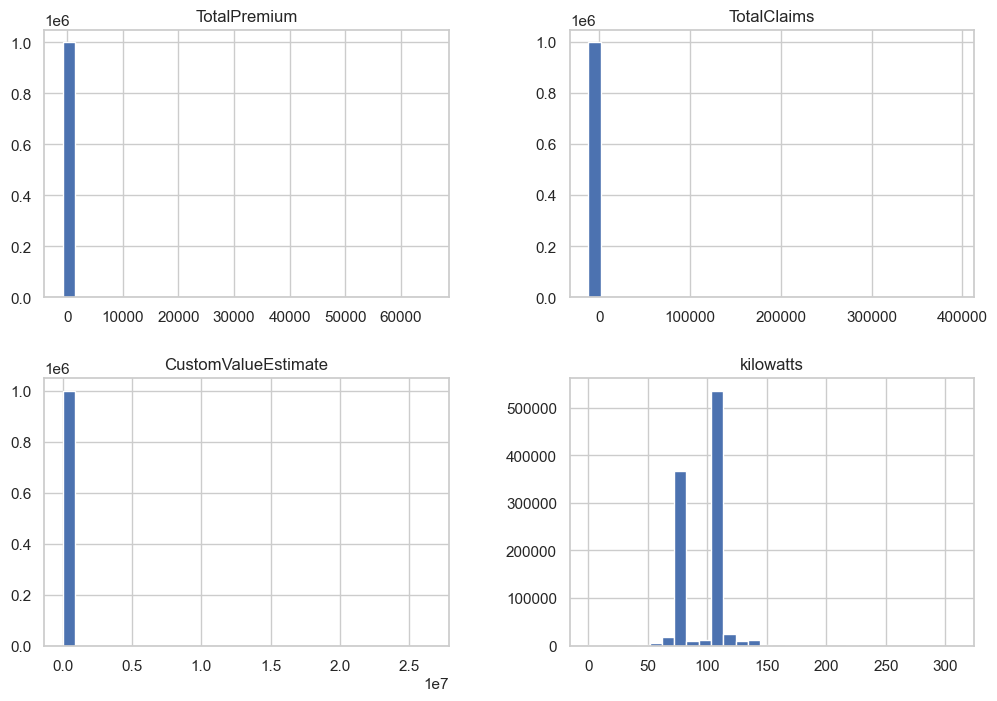

In [19]:
# Numerical columns
numerical_cols = ['TotalPremium', 'TotalClaims', 'CustomValueEstimate', 'kilowatts']
df[numerical_cols].hist(bins=30, figsize=(12,8))
plt.show()



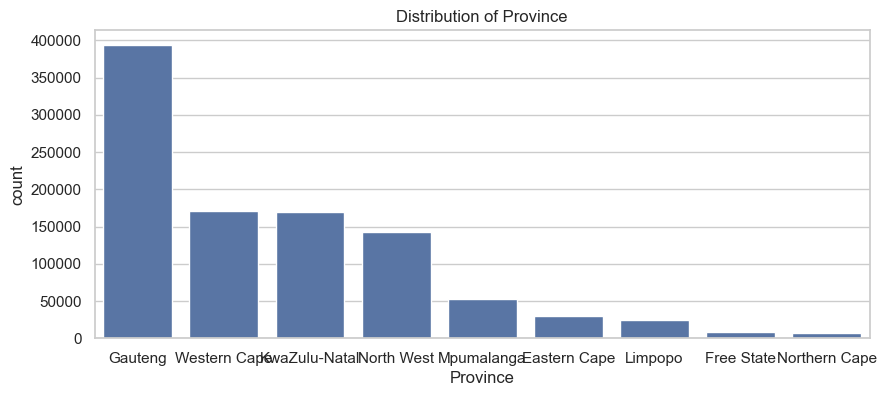

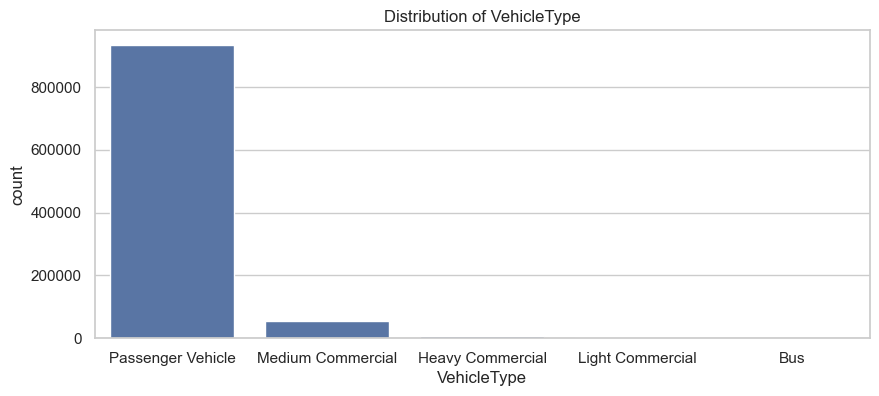

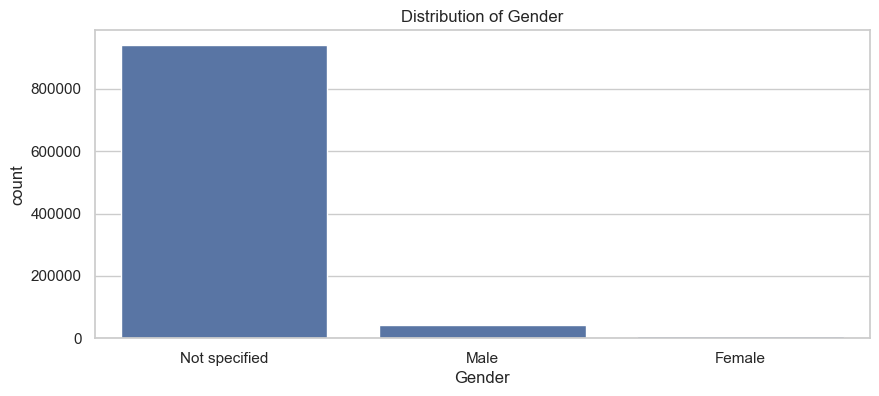

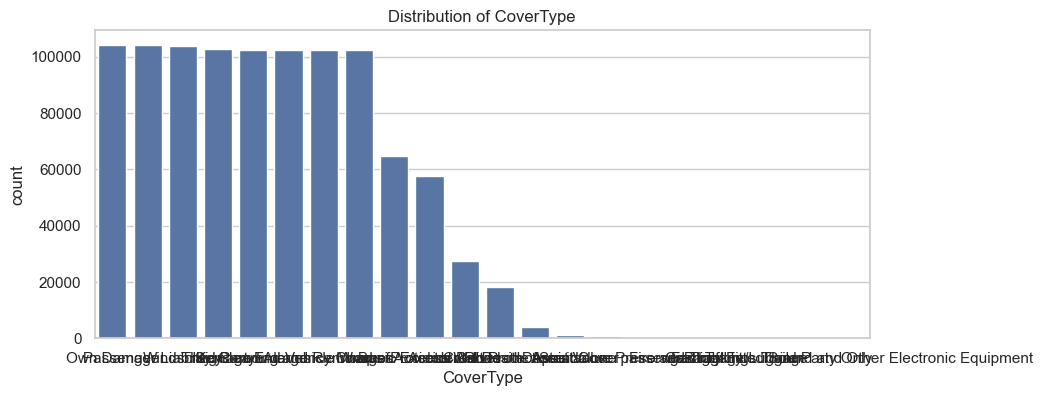

In [20]:
# Categorical columns
categorical_cols = ['Province', 'VehicleType', 'Gender', 'CoverType']
for col in categorical_cols:
    plt.figure(figsize=(10,4))
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Distribution of {col}')
    plt.show()
    

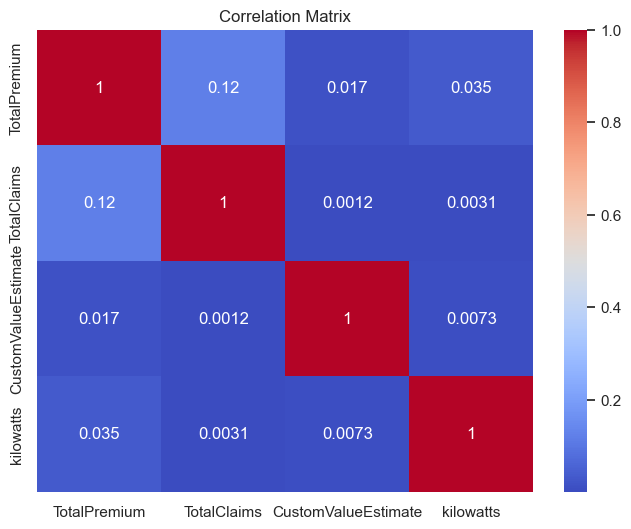

In [23]:
# Correlation between financial variables
plt.figure(figsize=(8,6))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()





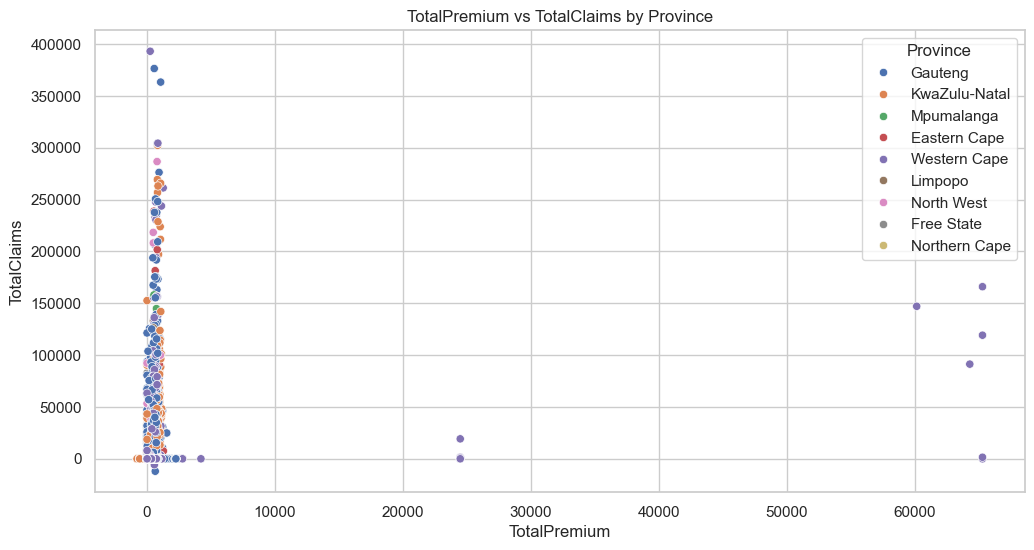

In [24]:

# TotalPremium vs TotalClaims by Province
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='TotalPremium', y='TotalClaims', hue='Province')
plt.title('TotalPremium vs TotalClaims by Province')
plt.show()


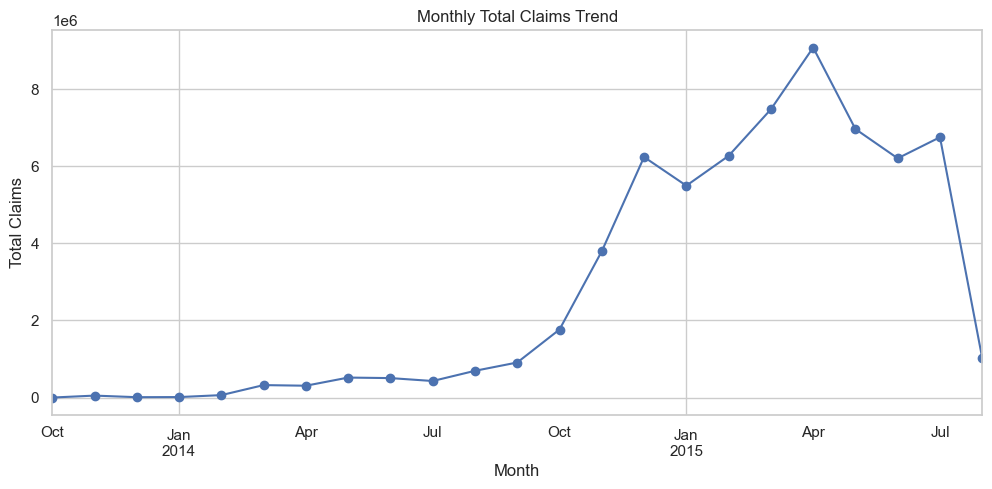

In [25]:
monthly_claims = df.groupby(df['TransactionMonth'].dt.to_period('M'))['TotalClaims'].sum()
monthly_claims.plot(figsize=(12,5), marker='o')
plt.title("Monthly Total Claims Trend")
plt.ylabel("Total Claims")
plt.xlabel("Month")
plt.show()


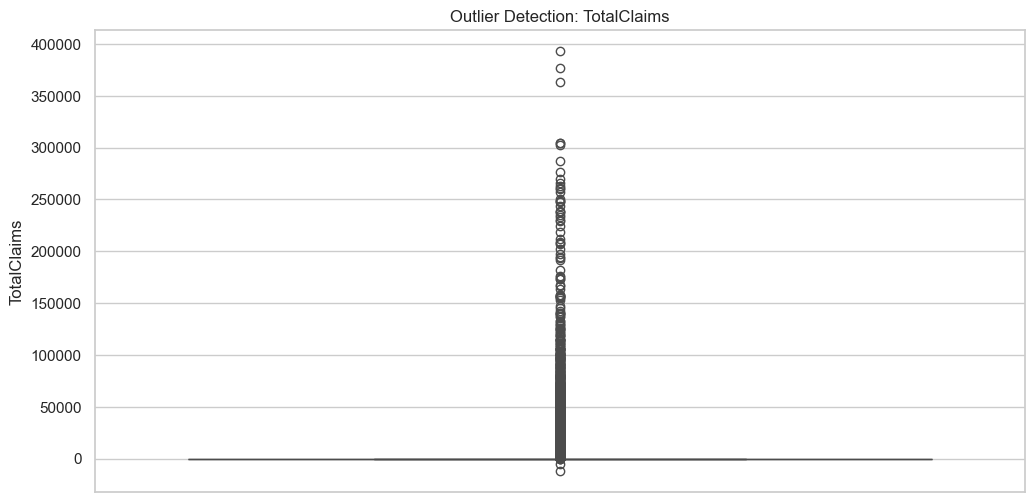

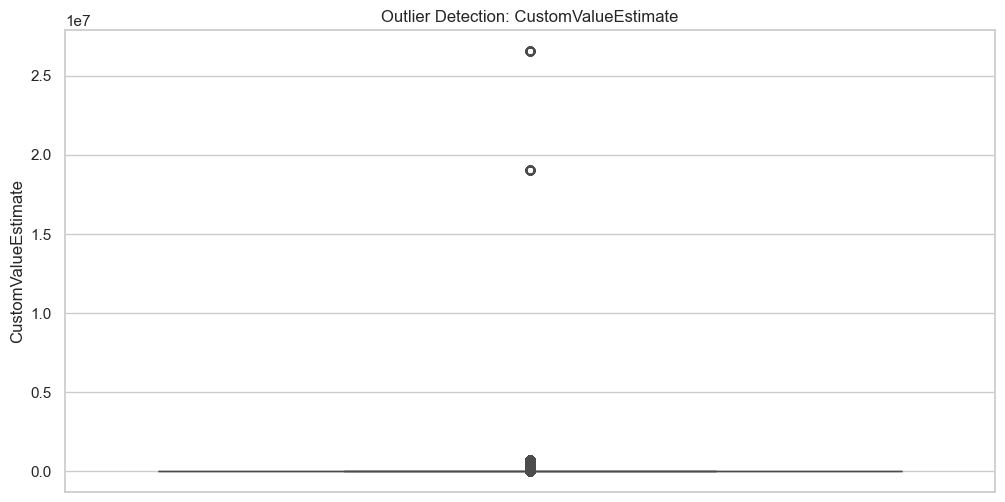

In [26]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='TotalClaims')
plt.title("Outlier Detection: TotalClaims")
plt.show()

plt.figure(figsize=(12,6))
sns.boxplot(data=df, y='CustomValueEstimate')
plt.title("Outlier Detection: CustomValueEstimate")
plt.show()
